In [12]:
### Importing dependencies
import csv
import random
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import load_model
from sklearn import preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [13]:
x_train = pd.read_csv("xTrainUMAP.csv",index_col=0)
x_test = pd.read_csv("xTestUMAP.csv",index_col=0)
y_train = pd.read_csv("yTrainUMAP.csv",index_col=0)
y_test = pd.read_csv("yTestUMAP.csv",index_col=0)

In [14]:
x_train = np.asarray(pre.MinMaxScaler().fit_transform(x_train)).astype(np.float64)
x_test = np.asarray(pre.MinMaxScaler().fit_transform(x_test)).astype(np.float64)


In [19]:

def build_model():
  model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape = (16,)),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(14, activation='relu'),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1)
  ])


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mse', 'mae'])
  return model

model = build_model()
model.summary()

class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 14)                  │             238 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 12)                  │             180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 12)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 6)                   │              78 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 775 (3.03 KB)

 Trainable params: 775 (3.03 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:

EPOCHS = 500

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=500)

# Note that the input only takes the first three columns
#history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size = 64, validation_split = 0.2, verbose=0, callbacks=PrintDot())


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [26]:
model = load_model("UMAPmodel.keras")

In [29]:
#Testing the model
test_predictions = model.predict(x_test)
print(root_mean_squared_error(y_test, test_predictions))
print(mean_squared_error(y_test, test_predictions))
print(r2_score(y_test, test_predictions))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
8.495352034744213
72.17100619423265
0.7326162457466125


In [106]:
y_test["UMAPpreds"] = test_predictions
y_test.to_csv('UMAPpreds.csv')

In [30]:
model.save("UMAPmodel.keras")

In [23]:
with open('UMAPpreds.csv', 'w', newline='') as file:
     writer = csv.writer(file)
     writer.writerows(test_predictions)

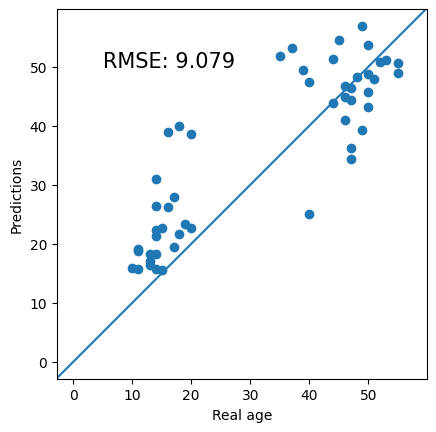

In [99]:

plt.scatter(y_test, test_predictions)
plt.annotate("RMSE: {:.3f}".format(root_mean_squared_error(y_test, test_predictions)), (5,50), size = 15)
plt.axline((0, 0), slope=1)
plt.ylabel("Predictions")
plt.xlabel("Real age")
plt.axis('square')
plt.savefig("plotSaves/umapPred16.png")
plt.show()

In [41]:
test_predictions = pd.DataFrame(test_predictions)
test_predictions.to_csv('UMAPpreds.csv')